In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, r2_score, mean_squared_error
from sklearn.datasets import load_diabetes, make_regression, make_classification, load_breast_cancer

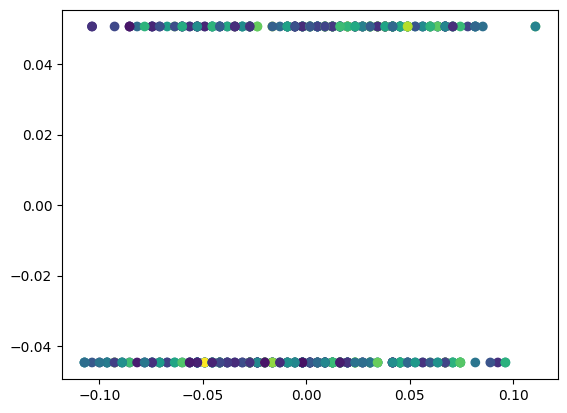

In [ ]:
X,y = load_diabetes(return_X_y=True)
# X,y = make_regression(n_samples=100, n_features=10, noise=10, random_state=556)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=57)
plt.scatter(X[:,0],X[:,1], c= y)

In [ ]:
class GradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=5, early_stop = 5):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.estimators = []
        self.residuals = None
        self.m1 = None
        self.early_stop = early_stop

    def fit(self,X_train, y_train):
      self.m1 = np.mean(y_train)
      self.residuals = y_train - self.m1
      best_val_score = None
      no_improvement = 0
      best_iteration = 0

      for _ in range(self.n_estimators):
        dt = DecisionTreeRegressor(max_depth=self.max_depth)
        dt.fit(X_train, self.residuals)
        self.estimators.append(dt)
        self.residuals = y_train - self.predict(X_train)
        val_score = r2_score(y_train, self.predict(X_train))
        if (best_val_score is None or val_score > best_val_score):
            best_val_score = val_score
            best_iteration = _
        else:
            no_improvement += 1
        if no_improvement >= self.early_stop or best_val_score >= .99:
            print(f"Early stopping at iteration {best_iteration}")
            break

      return self

    def predict(self, X_test):
        y_pred = np.zeros(X_test.shape[0])
        for dt in self.estimators:
            y_pred += self.learning_rate * dt.predict(X_test)
        y_pred += self.m1
        return y_pred

In [ ]:
md = GradientBoosting(n_estimators=100, learning_rate=0.1, max_depth=5)
md.fit(X_train, y_train)
y_pred = md.predict(X_test)
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.4358601572198624
3600.5317756529753


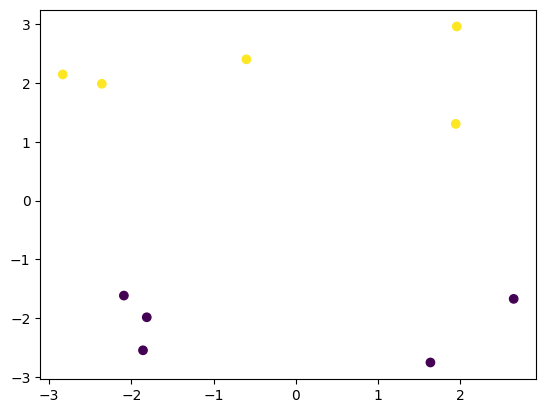

In [ ]:
X,y = make_classification(n_samples=10, n_features=2, n_informative=2, n_redundant=0,class_sep = 2 , random_state=105)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=57)
plt.scatter(X[:,0],X[:,1], c= y)

In [ ]:
class GBClassifier:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=5, early_stop = 5):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.estimators = []
        self.residuals = None
        self.m1 = None
        self.early_stop = early_stop

    def calc_prob(self, X):
        return 1/(1+np.exp(-X))

    def fit(self,X_train, y_train):
        value, count = np.unique(y_train, return_counts=True)
        self.m1 = np.full((X_train.shape[0], 1),np.log(count[1]/count[0]))
        Fm = self.m1.copy()
        print(self.residuals)

        for i in range(self.n_estimators):
            prob = self.calc_prob(Fm)
            self.residuals = y_train - prob
            dt = DecisionTreeRegressor(max_depth=self.max_depth)
            dt.fit(X_train, self.residuals)
            idx = dt.apply(X_train)

            for j in np.unique(idx):
                fltr = idx == j

                num = self.residuals[fltr].sum()
                den = (prob[fltr] * (1-prob[fltr])).sum()
                if den == 0 or num ==0:
                    break
                gamma = num/den

                Fm[fltr] = self.learning_rate * gamma
                dt.tree_.value[j,0,0] = gamma

            # plot_tree(dt)
            # plt.show()
            self.estimators.append(dt)

    def predict(self, X_test):
        y_pred = np.full((X_test.shape[0], 1), self.m1[0])
        print(y_pred.shape)

        for dt in self.estimators:
          print(dt.predict(X_test))
          print(X_test)
          y_pred += self.learning_rate * dt.predict(X_test)[0]

        return self.calc_prob(y_pred)


In [ ]:
md = GBClassifier(n_estimators=10, learning_rate=0.1, max_depth=5, early_stop=5)
md.fit(X_train, y_train)
y_pred = md.predict(X_test)
print(y_pred)
print(y_test)
print(accuracy_score(y_test, y_pred>0.5))

None
(3, 1)
[[-9.06682137e-16 -4.28571429e-01 -4.28571429e-01  5.71428571e-01
  -4.28571429e-01  5.71428571e-01  5.71428571e-01]
 [-9.06682137e-16 -4.28571429e-01 -4.28571429e-01  5.71428571e-01
  -4.28571429e-01  5.71428571e-01  5.71428571e-01]
 [-9.06682137e-16 -4.28571429e-01 -4.28571429e-01  5.71428571e-01
  -4.28571429e-01  5.71428571e-01  5.71428571e-01]]
[[-2.35901614  1.98401539]
 [-2.09082648 -1.61351386]
 [ 1.94390851  1.30241156]]


ValueError: non-broadcastable output operand with shape (3,1) doesn't match the broadcast shape (3,7)